**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 6 - Quantile Treatment Effects (QTE)

***

Key motivation is to look at treatment effects beyond the mean, and look at how different parts of the outcome distribution respond to the treatment. 

Example of QTE vs. ATE 

<img src="Quantile.JPG" alt="Drawing" style="width: 800px;"/>

Source: adapted from Markus Jochmann (2006), Three Essays on Bayesian Nonparametric Modeling in Microeconometrics.

## Application: Public-private sector wage differentials in Germany: Evidence from quantile regression

**Blaise Melly (Empirical Economics, 2005)**

For the author's website, with Stata and R codes and packages for quantile and distribution regression, see 


https://sites.google.com/site/blaisemelly/home/computer-programs

## 1. Introduction

* Across which groups are the wage distributions compared (i.e. how are the treated and control groups defined)? 
* How do you expect the wage distributions to differ across these groups, and why? 


***

## 2. Identification strategy and assumptions



### Setup and notation

* **Outcome variable:** $Y$ -  Log wages


* **Binary treatment variable:** $D\in\{0,1\}$ - Public ($D=1$) versus private sector employment ($D=0$)


* **Potential Outcomes:** $Y_0$, $Y_1$



* **Cumulative distribution function of the outcome variable $Y$ evaluated at $y$:** 

$$F_Y(y)=Pr(Y\le y)=E[\underline{1}(Y\le y)]$$


* **Quantile function evaluated at $0<\tau<1$:**

$$Q_Y(\tau)=F^{-1}_Y(\tau)=\inf\{y|F_Y(y)\ge\tau\}$$

e.g. $Q_Y(0.5)$ corresponding to the value of $Y$ at the median.

*Put graph here*



### What are the effects we are interested in?

So far we have analysed the effect of a treatment on the average outcome by looking at the **Average Treatement Effect (ATE)**:

$$ATE=E[Y_1-Y_0]$$

Now, we aim at estimating effects of a treatment on the distribution of the outcome variable. 

We consider two effect types:

**1. Distributional Treatment Effect (DTE):**

$$DTE(y)=F_{Y_1}(y)-F_{Y_0}(y)$$

Difference between the CDFs of the treatment and control group at a given value of $Y$.



**2. Quantile Treatment Effect (QTE):**

$$QTE(\tau)=Q_{Y_1}(\tau)-Q_{Y_0}(\tau)$$

Difference between the CDFs of the treatment and control group at a given quantile $\tau$.


Consider that $ATE=E[Y_1-Y_0]=E_{\tau}[QTE(\tau)]$





### Discussion of assumptions

**A1 Stable unit treatment value assumption (SUTVA):**

$Y=(1-D)Y_0+DY_1$

**A2 Random treatment assignment**

$Y_{d}\perp \!\!\! \perp D \text{  } \forall d \in{\{0,1\}} $

Later we relax this assumption to a **conditional independence assumption**:

$Y_{d}\perp \!\!\! \perp D | X \text{  } \forall d \in{\{0,1\}}, x\in\mathcal{X}$




Under assumptions **A1** and **A2** $F_{Y_0}(y)$ and $F_{Y_1}(y)$ are identified as:

$$F_{Y_0}(y)=E[\underline{1}(Y_0\le y)]=E[\underline{1}(Y\le y)|D=0]$$

$$F_{Y_1}(y)=E[\underline{1}(Y_1\le y)]=E[\underline{1}(Y\le y)|D=1]$$



***

## 3. Data

Data on the wages and characteristics of a representative sample of workers in Switzerland in 2014.

Log(wages), to have a normally distributed outcome. 


|variable name |   description |
|----:|----:|
| lnwage          |  log wage |
| public          |  Öffentlicher Sektor |
| alter           |  Lebensalter |
| befristet       |  Befristetes Anstellungsverhältnis |
| teilzeit        |  Teilzeit |
| frau            |  Frau |
| ausbild_cat1    |  Universitäre Hochschule (UNI, ETH) |
| ausbild_cat2    |  Fachhochschule (FH), Pädagogische Hochschule (PH) oder glw. Ausbildung |
| ausbild_cat3    |  Höhere Berufsausbildung mit eidg. Fachausweis, Diplom, höherer Fachprüfung/Meist |
| ausbild_cat4    |  Lehrerpatent auf verschiedenen Stufen: Primarlehrerseminar oder gleichwertige Au |
| ausbild_cat5    |  Gymnasiale Maturität, Berufsmaturität, Fachmaturität oder gleichwertige Ausbildu |
| ausbild_cat6    |  Abgeschl. Berufsausbildung, Vollzeit-Berufsschule, Diplom- oder Fachmittelschule |
| ausbild_cat7    |  Ausschliesslich unternehmensinterne, durch das BBT nicht anerkannte Berufsausbil |
| ausbild_cat8    |  Obligatorische Schule, ohne abgeschlossene Berufsausbildung |
| ausbild_cat9    |  Fehlende Werte der Ausbildung |
| berufst_cat1    |  Oberes Kader: Leitung oder Mitwirkung in der Geschäftsleitung |
| berufst_cat2    |  Mittleres Kader: Bereichsleitung, hohe Stabsfunktionen |
| berufst_cat3    |  Unteres Kader: Ausführungsorientierte Leitung eines Teilbereichs, qualifizierte |
| berufst_cat4    |  Unterstes Kader: Überwachung von Arbeiten gemäss genauer Anleitung |
| berufst_cat5    |  Ohne Kaderfunktion |
| berufst_cat6    |  Fehlende Werte der beruflichen Stellung |
| swiss           |  Schweizer/innen |
| married         |  Verheiratet |
| case            |  ID |
| dienstjahre     |  Dienstjahre |

***
## 4. Empirical Analysis

### Load packages

Special packages, see documentation (both very extensive):
* `quantreg`: https://rdrr.io/cran/quantreg/man/rq.html
* `Counterfactual`: https://arxiv.org/pdf/1610.07894.pdf

In [18]:
rm(list=ls())


packages_vector <- c("haven", "dplyr", "tidyr", "sandwich", "expss",
    				"fBasics", "xtable", "data.table", "stargazer", "mfx", 
    				"jtools", "ggplot2")
#install.packages(packages_vector)
lapply(packages_vector, require, character.only = TRUE) 


# Quantile-specific packages 
packaged_vector_rdd <- c("quantreg", "Counterfactual")
# install.packages(packages_vector)
lapply(packaged_vector_rdd, require, character.only = TRUE) 


# List loaded packages 
(.packages())

print('All packages successfully installed and loaded.')

Loading required package: ggpubr

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools


Attaching package: 'ggpubr'


The following object is masked from 'package:expss':

    compare_means




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[1] "ggpubr"         "Counterfactual" "quantreg"       "SparseM"       
 [5] "ggplot2"        "jtools"         "mfx"            "betareg"       
 [9] "MASS"           "lmtest"         "zoo"            "stargazer"     
[13] "data.table"     "xtable"         "fBasics"        "timeSeries"    
[17] "timeDate"       "expss"          "sandwich"       "tidyr"         
[21] "dplyr"          "haven"          "stats"          "graphics"      
[25] "grDevices"      "utils"          "datasets"       "methods"       
[29] "base"

[1] "All packages successfully installed and loaded."


### Load data 

In [19]:
data <-as.data.frame(read_dta("data_simple.dta"))
attach(data)

head(data)

The following objects are masked from data (pos = 4):

    alter, ausbild_cat1, ausbild_cat2, ausbild_cat3, ausbild_cat4,
    ausbild_cat5, ausbild_cat6, ausbild_cat7, ausbild_cat8,
    ausbild_cat9, befristet, berufst_cat1, berufst_cat2, berufst_cat3,
    berufst_cat4, berufst_cat5, berufst_cat6, case, dienstjahre, frau,
    lnwage, married, public, swiss, teilzeit


The following object is masked from package:datasets:

    swiss




,alter,lnwage,befristet,teilzeit,frau,public,ausbild_cat1,ausbild_cat2,ausbild_cat3,ausbild_cat4,...,berufst_cat1,berufst_cat2,berufst_cat3,berufst_cat4,berufst_cat5,berufst_cat6,swiss,married,case,dienstjahre
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,8.690810,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,4
2,16,8.059592,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,6,1
3,37,9.320091,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,7,15
4,24,8.246172,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,9,2
5,4,8.564267,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,15,3
6,7,8.828934,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,22,7


***

## Descriptive statistics 

### Number of public and private sector employees

In [3]:
cro(public)

,,#Total
Öffentlicher Sektor,0,106059
,1,35916
,#Total cases,141975


### Differences in average characteristics between individuals in the treatment and control group

In [4]:
# Variables for table
descriptives <- dplyr::select(data, lnwage, alter, frau, teilzeit, befristet, swiss, married, dienstjahre) 
descriptives_names  <- colnames(descriptives)


# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}

# Define a function estimating the differences in variables across D
balance_check <- function(x){
    
 
    # Conditional means
    mean_private <- mean(x[data$public==0], na.rm=TRUE)
    mean_public <- mean(x[data$public==1], na.rm=TRUE)
    
    # Difference in means
    diff <- lm(x ~ data$public)
    cov <- vcovHC(diff, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_private = mean_private, 
         mean_public = mean_public,
         coeff = diff$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(diff$coefficients[2]/robust.se[2]))
        )             
}

diff_output <- apply(descriptives, 2, balance_check)

# convert list to table
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- descriptives_names
colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", 
                          "Difference", "s.e.", 
                          "p-value")

# plot table
print("Difference in means by treatment status")
xtable(diff_output, digits=3)

[1] "Difference in means by treatment status"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value
lnwage,8.828,8.986,0.158,0.002,0.000
alter,20.378,21.680,1.301,0.063,0.000
frau,0.427,0.544,0.118,0.003,0.000
teilzeit,0.287,0.502,0.215,0.003,0.000
befristet,0.031,0.137,0.106,0.002,0.000
swiss,0.659,0.819,0.160,0.002,0.000
married,0.519,0.518,-0.001,0.003,0.796
dienstjahre,8.071,8.844,0.773,0.052,0.000


### Distribution of wages across groups
**1. Density Plot**

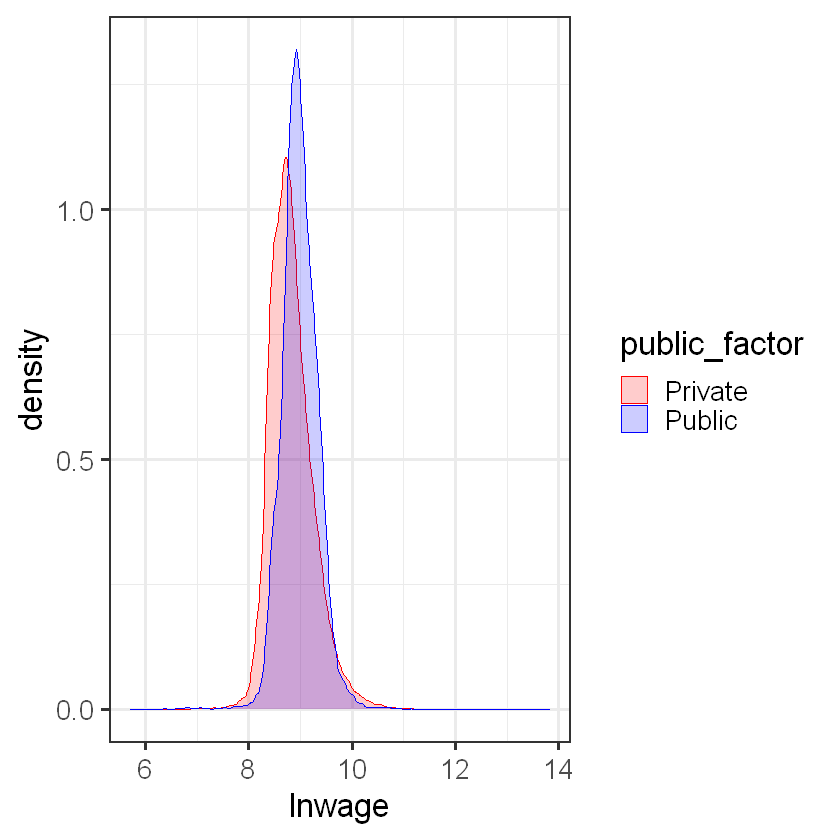

In [5]:
# Factor public variable for plots
data$public_factor <- factor(data$public, 
levels = c(0,1), label = c("Private", "Public")) 


density_public_private <- ggplot(data, 
    aes(x=lnwage, 
    group=public_factor, 
    color=public_factor, 
    fill=public_factor)) +
    geom_density(alpha=0.2) +
    scale_color_manual(values=c("red", "blue")) +
    scale_fill_manual(values=c("red", "blue")) +
    theme_bw(base_size = 20) 
density_public_private

**2. Cumulative Distribution**

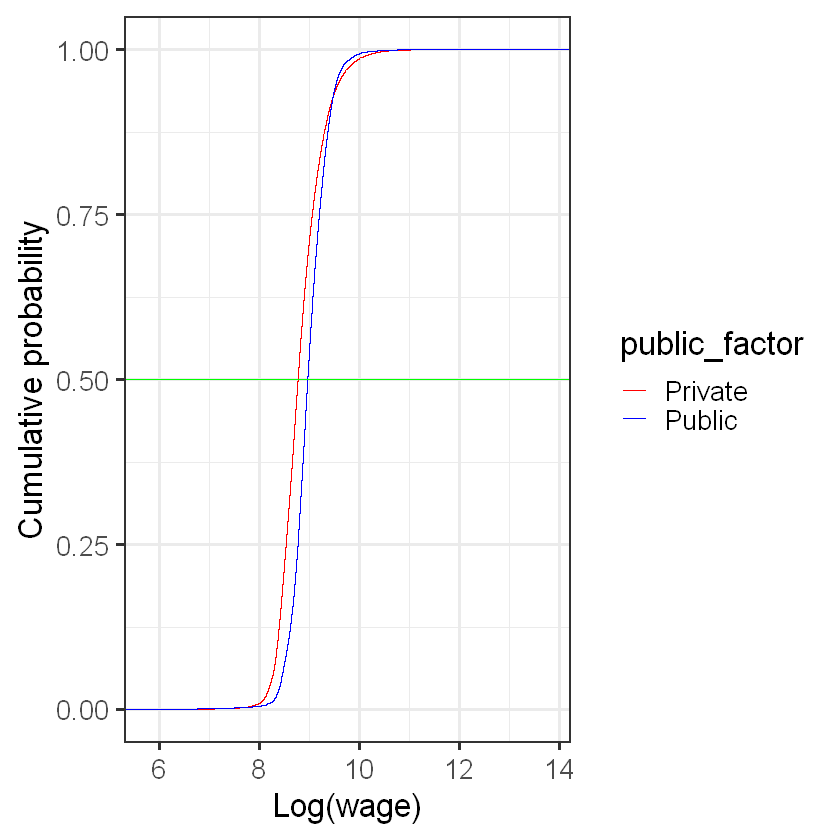

In [6]:
cdf_public_private <- ggplot(data, aes(lnwage, colour = public_factor)) + 
                        stat_ecdf() + 
                        ylab("Cumulative probability") +
                        xlab("Log(wage)") +
                        geom_hline(yintercept=0.5, color = "green") +
                        scale_color_manual(values=c("red", "blue")) +
                        scale_fill_manual(values=c("red", "blue")) +
                        theme_bw(base_size = 20) 

cdf_public_private

**3. Quantiles of wages**

In [7]:
quantiles_all <- quantile(lnwage, 
                          probs = seq(0, 1, 0.2), 
                          na.rm = FALSE,
                          names = TRUE,
                          type = 7)

quantiles_public <- quantile(lnwage[public==1], 
                             probs = seq(0, 1, 0.2), 
                             na.rm = FALSE,
                             names = TRUE,
                             type = 7)

quantiles_private <- quantile(lnwage[public==0], 
                              probs = seq(0, 1, 0.2), 
                              na.rm = FALSE,
                              names = TRUE, 
                              type = 7)

print("Quantiles of log wage all")
quantiles_all

print("Quantiles of log wage public sector")
quantiles_public

print("Quantiles of log wage private sector")
quantiles_private

[1] "Quantiles of log wage all"


0%       20%       40%       60%       80%      100% 
 5.707110  8.526906  8.739536  8.927978  9.184201 13.813910

[1] "Quantiles of log wage public sector"


0%       20%       40%       60%       80%      100% 
 5.777652  8.722906  8.894258  9.051579  9.263502 11.891821

[1] "Quantiles of log wage private sector"


0%       20%       40%       60%       80%      100% 
 5.707110  8.483430  8.684232  8.871646  9.141140 13.813910

**4. Quantile Functions**

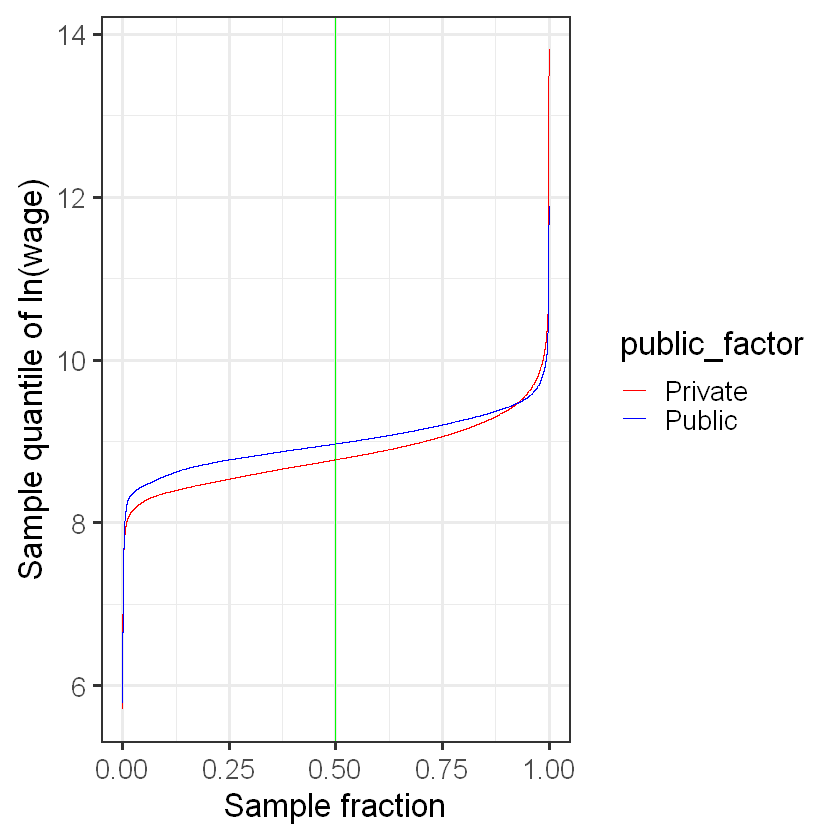

In [8]:
# Public
lnwage_sorted <- sort(lnwage[public==1]) 
length <- length(lnwage_sorted)
i <- 1:length
perc <- (i - 1)/(length - 1) # Formula to compute the percentile of an observation
data_plot_public <- data.frame(lnwage_sorted, perc)
data_plot_public$public <- 1

# Private
lnwage_sorted <- sort(lnwage[public==0]) 
length <- length(lnwage_sorted)
i <- 1:length
perc <- (i - 1)/(length - 1) 
data_plot_private <- data.frame(lnwage_sorted, perc)
data_plot_private$public <- 0


data_plot <- rbind(data_plot_public, data_plot_private)
data_plot$public_factor <- factor(data_plot$public, 
                        levels = c(0,1), label = c("Private", "Public")) 

# Plot
qplot_public_private <- ggplot(data_plot, aes(x = perc, y = lnwage_sorted, 
                        group=public_factor, color=public_factor)) +
                        geom_line() + 
                        geom_vline(xintercept=0.5, color = "green") +
                        ylab("Sample quantile of ln(wage)") +
                        xlab("Sample fraction") +
                        scale_color_manual(values=c("red", "blue")) + 
                        theme_bw(base_size = 20) 

qplot_public_private

***

## Estimation

We estimate the effects of public sector employment on wages first via OLS, then using quantile regressions. 

We start by showing unconditional estimations for illustrative purpuses of the method even though there is no reason to believe that public sector employment is random in this context.

Thus, in a second step, we additionally include control variables and estimate conditional ATE and QTE.

### Unconditional OLS

The unconditional mean solves:
$$\mu=\arg\min_m E[(Y-m)^2]$$

In [9]:
ols1 <- lm(lnwage ~ public)
out.ols1 <-summ(ols1, , robust = "HC1")
out.ols1

MODEL INFO:
Observations: 141975
Dependent Variable: lnwage
Type: OLS linear regression 

MODEL FIT:
F(1,141973) = 3988.87, p = 0.00
R² = 0.03
Adj. R² = 0.03 

Standard errors: Robust, type = HC1
------------------------------------------------
                    Est.   S.E.    t val.      p
----------------- ------ ------ --------- ------
(Intercept)         8.83   0.00   6710.89   0.00
public              0.16   0.00     69.34   0.00
------------------------------------------------


### Conditional OLS

Conditional OLS solves:
$$\beta=\arg\min_b E[(Y-X'b)^2]$$

In [21]:
# Selected covariates
covariates <- dplyr::select(data, alter, frau, teilzeit, swiss, married, dienstjahre) 
covariates_names  <- colnames(covariates)
covariates <- as.matrix(covariates) # make sure covariates are a matrix 


ols2 <- lm(lnwage ~ public + covariates)
out.ols2 <-summ(ols2, , robust = "HC1")
out.ols2

MODEL INFO:
Observations: 141975
Dependent Variable: lnwage
Type: OLS linear regression 

MODEL FIT:
F(7,141967) = 4480.18, p = 0.00
R² = 0.18
Adj. R² = 0.18 

Standard errors: Robust, type = HC1
-----------------------------------------------------------
                               Est.   S.E.    t val.      p
--------------------------- ------- ------ --------- ------
(Intercept)                    8.62   0.00   3226.13   0.00
public                         0.16   0.00     77.65   0.00
covariatesalter                0.01   0.00     86.29   0.00
covariatesfrau                -0.15   0.00    -65.87   0.00
covariatesteilzeit            -0.06   0.00    -26.27   0.00
covariatesswiss                0.07   0.00     29.29   0.00
covariatesmarried              0.04   0.00     19.93   0.00
covariatesdienstjahre          0.00   0.00     14.85   0.00
-----------------------------------------------------------

### Unconditional median regression

The $\tau$ unconditional quantile solves:
$$Q_Y(\tau)=\arg\min_q E[\rho_{\tau}(Y-q)]$$

at the median

$$Q_Y(0.5)=\arg\min_q E[\rho_{0.5}(Y-q)]$$

In [11]:
rq1 <- rq(lnwage ~ public, 
          tau=.5, 
          data=data, 
          method="br", 
          model = TRUE) 
out.rq1 <- summary(rq1)
out.rq1

median_public <- quantile(lnwage[public==1], .5)
print("Median public sector")
median_public
median_private <- quantile(lnwage[public==0], .5)
print("Median private sector")
median_private

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"



Call: rq(formula = lnwage ~ public, tau = 0.5, data = data, method = "br", 
    model = TRUE)

tau: [1] 0.5

Coefficients:
            Value      Std. Error t value    Pr(>|t|)  
(Intercept)    8.77509    0.00147 5984.36902    0.00000
public         0.19382    0.00252   76.96003    0.00000

[1] "Median public sector"


50% 
8.968905

[1] "Median private sector"


50% 
8.775086

### Conditional quantile regression

The $\tau$ quantile regression solves:
$$\beta(\tau)=\arg\min_b E[\rho_{\tau}(Y-X'b)]$$
where
$$\rho_{\tau}(Y-X'b)=\{\tau-\underline{1}[(Y-X'b)\le 0]\}\cdot (Y-X'b)$$

In [12]:
# Conditional quantile for the median
# ----------------------------------------------------

rq2 <- rq(lnwage ~ public + covariates, 
            tau=.5, 
            data=data, 
            method="br", 
            model = TRUE) 
out.rq2 <- summary(rq2)
out.rq2


Call: rq(formula = lnwage ~ public + covariates, tau = 0.5, data = data, 
    method = "br", model = TRUE)

tau: [1] 0.5

Coefficients:
                      Value      Std. Error t value    Pr(>|t|)  
(Intercept)              8.54608    0.00304 2814.35915    0.00000
public                   0.20336    0.00220   92.23498    0.00000
covariatesalter          0.00990    0.00013   74.45242    0.00000
covariatesfrau          -0.13619    0.00228  -59.61933    0.00000
covariatesteilzeit      -0.03583    0.00238  -15.07396    0.00000
covariatesswiss          0.09821    0.00269   36.56745    0.00000
covariatesmarried        0.02798    0.00232   12.06784    0.00000
covariatesdienstjahre    0.00210    0.00015   13.57275    0.00000

In [13]:
# Conditional quantile regression, across different quantiles

# Vector of quantiles to be estimated has to be strictly within (0,1) interval 
quants <- as.matrix(seq(0.1, 0.9, by=0.2)) 

rq3 <- rq(lnwage ~ public + covariates, 
            tau=quants, 
            data=data, 
            method="br", 
            model = TRUE) 
out.rq3 <- summary(rq3)
out.rq3


Call: rq(formula = lnwage ~ public + covariates, tau = quants, data = data, 
    method = "br", model = TRUE)

tau: [1] 0.1

Coefficients:
                      Value      Std. Error t value    Pr(>|t|)  
(Intercept)              8.26314    0.00314 2634.45015    0.00000
public                   0.19927    0.00265   75.16281    0.00000
covariatesalter          0.00402    0.00013   30.49633    0.00000
covariatesfrau          -0.14300    0.00245  -58.40122    0.00000
covariatesteilzeit      -0.03628    0.00265  -13.70097    0.00000
covariatesswiss          0.12223    0.00260   47.05544    0.00000
covariatesmarried        0.01922    0.00236    8.12764    0.00000
covariatesdienstjahre    0.00592    0.00015   39.50371    0.00000

Call: rq(formula = lnwage ~ public + covariates, tau = quants, data = data, 
    method = "br", model = TRUE)

tau: [1] 0.3

Coefficients:
                      Value      Std. Error t value    Pr(>|t|)  
(Intercept)              8.42630    0.00260 3235.82669    0.

### Presenting QR results

**Recipe:**

* Plot graphs of the coefficient estimates with confidence bounds: y-axis:  covariate effects $β(τ)$; x-axis: quantile of $Y$.


* Show the corresponding OLS coefficient (ATE) estimate and confidence intervals on the graph.


* Interpret the meaning of the effects:
    * Impact of a on unit change of the covariate/treatment on wages (in percent) holding the other covariates fixed.


* Interpret the meaning of the pattern (location, location/scale argumentation)
    * The impact of $X$ is the same across quantiles and is non-zero on average (ATE): location shift of the distribution of $Y$
    * The impact of $X$ differs across quantiles but is zero on average: scale shift of the distribution of $Y$
    * The impact of $X$ differs across quantiles and is non-zero on average: location and scale shift of the distribution of $Y$


* Intercepts vs. centercepts - center covariates to interpret intercepts for a representative case


### Plot conditional quantile effects

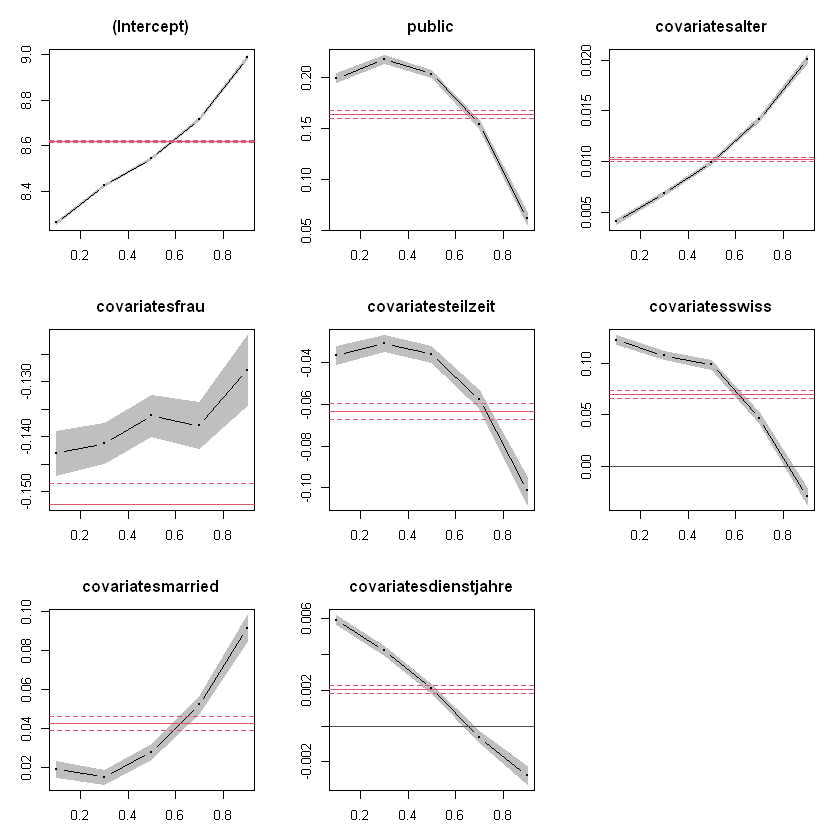

In [14]:
# Plot quantile effects
plot(out.rq3)

## Unconditional QTE 


* Estimate the unconditional QTE based on the estimation and inference methods for counterfactual analysis described in Chernozhukov, Fernandez-Val and Melly (2013)

* apply the `Counterfactual` package

In [22]:
# Draw a small random sample (since the estimation takes long)
index <- sample(x=1:nrow(data), size=1000)
sample_cf <- data[index,]
covariates <-covariates[index,]

#efine the quantiles and the range
taus <- c(1:99)/100
first <- sum(as.double(taus <= .10))
last <- sum(as.double(taus <= .90))
rang <- c(first:last)
# tails of the distribution should not be used because standard asymptotic does not apply to these parts.

# Estimation
rq.4 <-  counterfactual(lnwage ~ covariates, 
                        data=sample_cf, group=public, 
                        quantiles=taus,
                        treatment = TRUE, 
                        decomposition = TRUE,  
                        reps = 49,  
                        sepcore = TRUE, 
                        ncore=2) 

Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message 

cores used= 2 
                                  
Conditional Model:                      linear quantile regression
Number of regressions estimated:         100 

The variance has been estimated by bootstraping the results 49 times.

No. of obs. in the reference group:      748 
No. of obs. in the counterfactual group: 252 


                    Quantile Effects -- Structure                      
---------------------------------------------------------------------- 
                     Pointwise      Pointwise           Functional     
 Quantile     Est.    Std.Err   95% Conf.Interval   95% Conf.Interval  
    0.01     0.193    0.0379     0.119     0.267     0.102     0.285
    0.02     0.193    0.0353     0.124     0.263     0.108     0.279
    0.03     0.194    0.0332     0.128     0.259     0.113     0.274
    0.04     0.194    0.0319     0.131     0.256     0.117     0.271
    0.05     0.195    0.0317     0.133     0.258     0.119     0.272
    0.06     0.197    0.0317     0.135

#### Plot the estimated effects

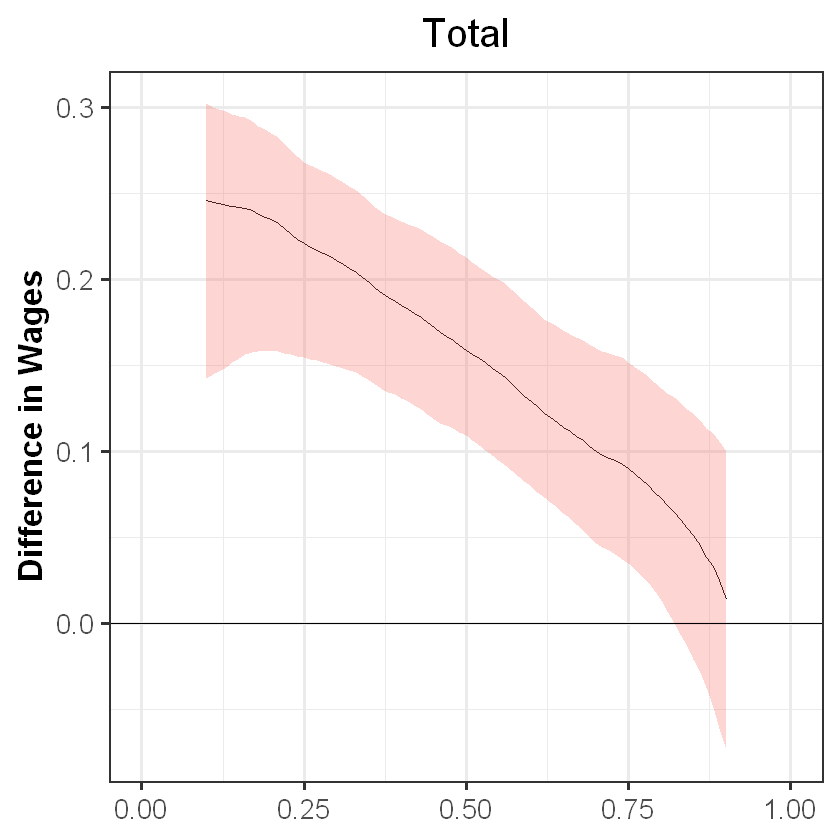

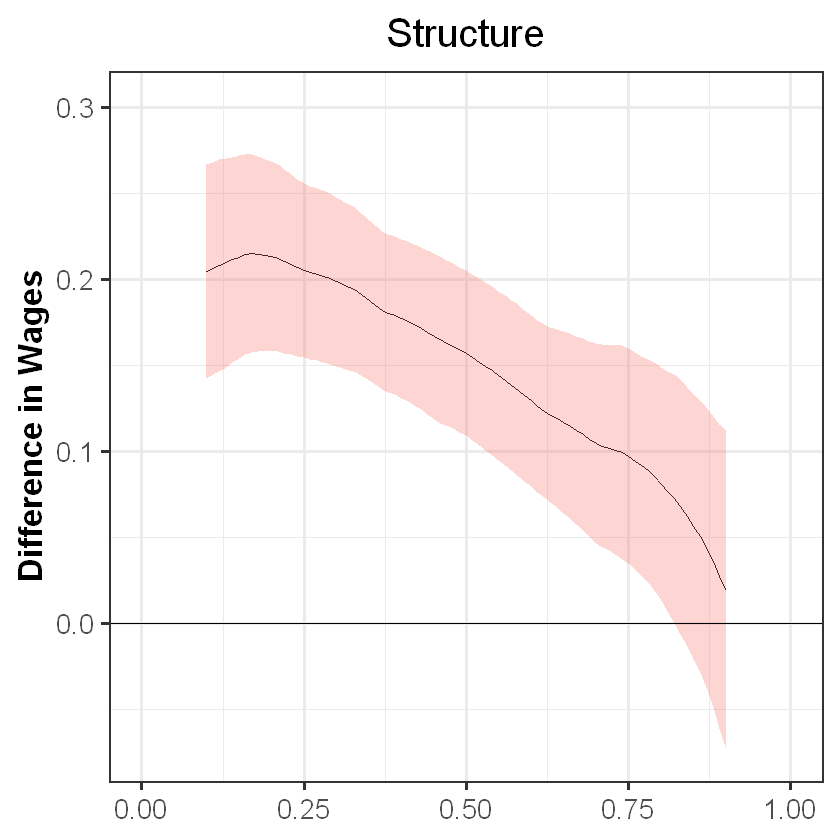

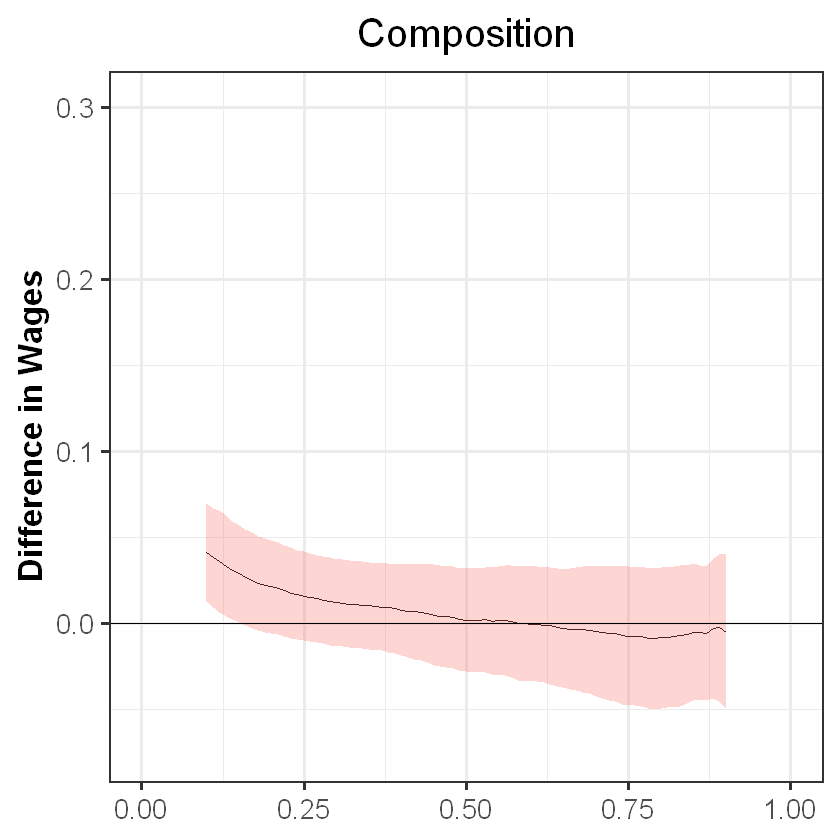

In [28]:
# Collect estimates and SE

# Structure
duqf_SE <- (rq.4$resSE)[,1]
l.duqf_SE <- (rq.4$resSE)[,3]
u.duqf_SE <- (rq.4$resSE)[,4]

# Composition
duqf_CE <- (rq.4$resCE)[,1]
l.duqf_CE <- (rq.4$resCE)[,3]
u.duqf_CE <- (rq.4$resCE)[,4]

# Total
duqf_TE <- (rq.4$resTE)[,1]
l.duqf_TE <- (rq.4$resTE)[,3]
u.duqf_TE <- (rq.4$resTE)[,4]

# create one data set for all estimates
rq.4_se <- cbind(duqf_SE,l.duqf_SE,u.duqf_SE)
rq.4_ce <- cbind(duqf_CE,l.duqf_CE,u.duqf_CE)
rq.4_te <- cbind(duqf_TE,l.duqf_TE,u.duqf_TE)
rq.4_all <- as.data.frame(cbind(taus, rq.4_se, rq.4_ce, rq.4_te))
rq.4_all <- rq.4_all[rang,]

# Define a range for y
min_y <- min(c(min(l.duqf_SE[rang]), min(l.duqf_CE[rang]),min(l.duqf_TE[rang])))
max_y <- max(c(max(u.duqf_SE[rang]), max(u.duqf_CE[rang]),max(u.duqf_TE[rang])))

# Plot with ggplot
p.te<-ggplot()+
      geom_line(data = rq.4_all, aes(x = taus, y = duqf_TE)) +
      geom_ribbon(data=rq.4_all, aes(ymin=l.duqf_SE,ymax=u.duqf_TE,  x=taus, fill = "band" ),alpha=0.3)+
      theme_bw(base_size = 20) +
      theme(axis.title = element_text(face = "bold"),
            axis.title.x = element_blank()) +
      ylab("Difference in Wages") +
      xlab("Quantiles") +
      ylim(min_y, max_y) +
      xlim(0, 1) +
      geom_hline(yintercept = 0) +
      theme(legend.position = "none") +
      ggtitle("Total") +
      theme(plot.title = element_text(hjust = 0.5))

p.se<-ggplot()+
      geom_line(data = rq.4_all, aes(x = taus, y = duqf_SE)) +
      geom_ribbon(data=rq.4_all, aes(ymin=l.duqf_SE,ymax=u.duqf_SE,  x=taus, fill = "band" ),alpha=0.3)+
       theme_bw(base_size = 20) +
      theme(axis.title = element_text(face = "bold"),
            axis.title.x = element_blank()) +
      ylab("Difference in Wages") +
      xlab("Quantiles") +
      ylim(min_y, max_y) +
      xlim(0, 1) +
      geom_hline(yintercept = 0) +
      theme(legend.position = "none") +
      ggtitle("Structure")  +
      theme(plot.title = element_text(hjust = 0.5))

p.ce<-ggplot()+
      geom_line(data = rq.4_all, aes(x = taus, y = duqf_CE)) +
      geom_ribbon(data=rq.4_all, aes(ymin=l.duqf_CE,ymax=u.duqf_CE,  x=taus, fill = "band" ),alpha=0.3)+
       theme_bw(base_size = 20) +
      theme(axis.title = element_text(face = "bold"),
            axis.title.x = element_blank()) +
      ylab("Difference in Wages") +
      xlab("Quantiles") +
      ylim(min_y, max_y) +
      xlim(0, 1) +
      geom_hline(yintercept = 0) +
      theme(legend.position = "none") +
      ggtitle("Composition")  +
      theme(plot.title = element_text(hjust = 0.5))

p.te
p.se
p.ce